In [1]:
import numpy as np
from numpy.linalg import eigvals 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def RandHerm(N):
    """
    Return a new random single-precision complex matrix of given shape N, with both 
    real and imaginary parts distrubuted accordingly to a normal distribution of mean 1 
    and variance 1.

    Parameters
    ----------
    N : int 
        Shape of the matrix.

    Returns
    -------
    A : ndarray
        2D array (matrix) of complex numbers with the given shape.
    """
    shape = (N,N)
    C = np.random.normal(loc=1., size=shape) + 1.j*np.random.normal(loc=1.,size=shape)
    A = (C + C.conj().T)/2
    return A


def NormSpacing(A, A_is_diag=False):
    """
    Given an Hermitian matrix, returns its normalized spacing between eigenvalues.

    Parameters
    ----------
    A : 2D ndarray 
        Hermitian matrix
    A_is_diag : bool
        If A is already diagonal, set it to True. Default is False.

    Returns
    -------
    Lambda : ndarray
        Normalized spacing between A eigenvalues.
    """
    N = A.shape[0]
    if (not A_is_diag):
        # sorted eigenvalues
        eig = np.sort(np.real(eigvals(A)))
    else:
        eig = np.sort(A)
    # normalized spacing
    # exclude the last eigenvalue
    Lambda = np.ones(N-2)
    for i in range(N-2):
        Lambda[i] = (eig[i+1] - eig[i])
    Lambda_avg = np.mean(eig)
    s = Lambda/Lambda_avg
    return s


def NormSpacingPdf(N, n_rep, diag=False):
    """
    Compute P(s), the distribution of normalized spacing s of a random Hermitian matrix of shape (N,N).

    Parameters
    ----------
    N : int 
        Shape of the matrix.
    n_rep : int
        Number of repetitions to compute P(s).
    diag : bool
        True if one want to generate random real diagonal matrix.

    Returns
    -------
    s, Ps : ndarray, ndarray
        s and its distribution P(s).
    """
    # collect data
    data = np.array([])
    for i in range(n_rep):
        if (not diag):
            # generate random hermitian matrix
            A = RandHerm(N)
            # compute norm. spacing s
            s_data = NormSpacing(A)
        else:
            A = np.random.normal(loc=1., size=N)
            s_data = NormSpacing(A, A_is_diag=True)
        data = np.append(data, s_data)

    # compute P(s) (number of bins = sqrt(number of data points))
    histogram = plt.hist(data, int(np.sqrt(N*n_rep)), density=True)
    # y
    Ps = histogram[0]
    # x
    bin_edges = histogram[1]
    s = np.ones(len(bin_edges)-1)
    # shift
    for jj in range(len(bin_edges)-1):
        s[jj] = bin_edges[jj] + (bin_edges[jj+1]-bin_edges[jj])/2
    
    return s, Ps 

def parametric_curve(s, a, b, alpha, beta):
    """
    Parametric curve of the type a*s^alpha*exp(b*s^beta)

    Parameters
    ----------
    s : real 
        curve variable
    a, b, alpha, beta : real
        curve paraeters

    Returns
    -------
    y : real
    """
    y = (a*s**alpha)*np.exp(b*s**beta)
    return y


def fitCurve(curve, x, y, bnds = (-np.inf, np.inf)):
    """
    Fit a parametric curve and returns the optimal parameters (least-square)

    Parameters
    ----------
    curve : real function 
        paraetric curve to be fitted
    x, y : real
        data
    bnds : ([], []) or (,)
       boundaries on the parameters 

    Returns
    -------
    params : ndarray
        list of parameters (4)
    """
    params, covariance = curve_fit(curve, x, y, bounds=bnds)
    a, b, alpha, beta = params

    x_fit = np.linspace(min(x), max(x), 500)
    y_fit = parametric_curve(x_fit, a, b, alpha, beta)
 
    fig, ax = plt.subplots(figsize = (10,7))
    ax.scatter(x, y, label='Data', marker='.')
    
    ax.plot(x_fit, y_fit, label=r'Fitted Curve: $P(s) = as^{\alpha}e^{b\cdot s^{\beta}}$', color='red')
    ax.legend(fontsize=18)
    ax.set_xlabel('s', fontsize=18)
    ax.set_ylabel('P(s)', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid()
    
    return params


#####################################################################


def parametric_curve2(s, a, b):
    """
    Parametric curve of the type a*exp(b*s)

    Parameters
    ----------
    s : real 
        curve variable
    a, b, alpha, beta : real
        curve paraeters

    Returns
    -------
    y : real
    """
    alpha=0
    beta=1
    return (a*s**alpha)*np.exp(b*s**beta)



def fitCurve2(curve, x, y, bnds = (-np.inf, np.inf)):
    """
    Fit a parametric curve and returns the optimal parameters (least-square)

    Parameters
    ----------
    curve : real function 
        paraetric curve to be fitted
    x, y : real
        data
    bnds : ([], []) or (,)
       boundaries on the parameters 

    Returns
    -------
    params : ndarray
        list of parameters (2)
    """
    params, covariance = curve_fit(curve, x, y, bounds=bnds)
    a, b = params

    x_fit = np.linspace(min(x), max(x), 500)
    y_fit = parametric_curve2(x_fit, a, b)
 
    fig, ax = plt.subplots(figsize = (10,7))
    ax.scatter(x, y, label='Data')
    
    ax.plot(x_fit, y_fit, label=r'Fitted Curve: $P(s) = ae^{b\cdot s}$', color='red')
    ax.legend(fontsize=18)
    ax.set_xlabel('s', fontsize=18)
    ax.set_ylabel('P(s)', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid()
    
    return params

In [3]:
# set the seed
np.random.seed(27)
# dimension size of matrices (N,N)
N = 1000
# number of repetitions to evalueate P(s)
n_rep = 20

array([ 2.28188646e+04, -4.55689537e+01,  2.57990761e+00,  1.34325227e+00])

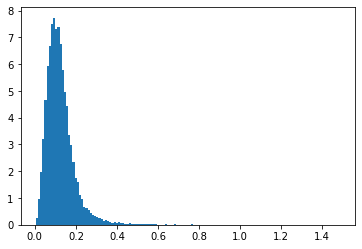

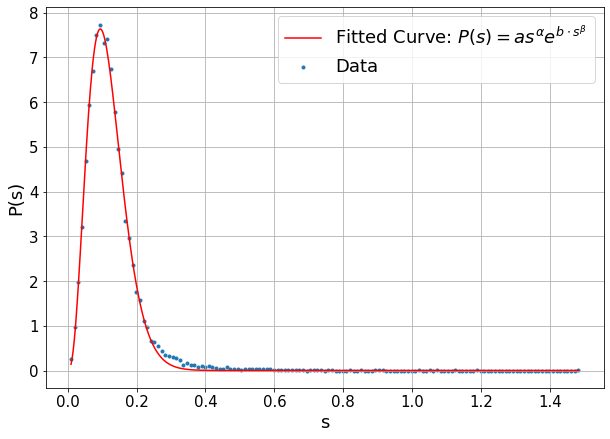

In [4]:
s_herm, Ps_herm = NormSpacingPdf(N, n_rep)
#...
fitCurve(parametric_curve, s_herm, Ps_herm, bnds=([-np.inf, -np.inf, 0, 0 ], [+np.inf, +np.inf, 3, 3 ]))

array([ 287.39791494, -284.69993171])

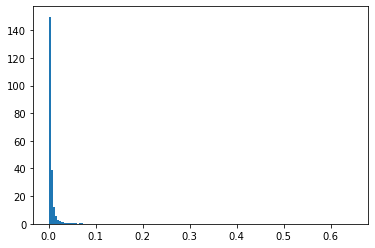

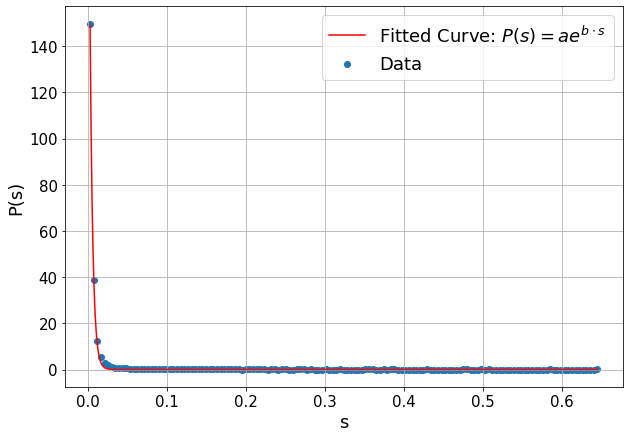

In [5]:
s_real, Ps_real = NormSpacingPdf(N, n_rep, diag=True)
fitCurve2(parametric_curve2, s_real, Ps_real)